# Paso 1. Descarga los datos y prepáralos para el análisis

Almacena los datos de visitas, pedidos y gastos en variables.  Optimiza los datos para el análisis. Asegúrate de que cada columna contenga el tipo de datos correcto.

## Rutas de archivos: 

- /datasets/visits_log_us.csv. Descarga el dataset

- /datasets/orders_log_us.csv. Descarga el dataset

- /datasets/costs_us.csv. Descarga el dataset

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import stats as st
from IPython.display import display
from scipy.stats import ttest_ind

In [2]:
costs_us = pd.read_csv('costs_us.csv')
orders_log_us = pd.read_csv('orders_log_us.csv')
visits_log_us =pd.read_csv('visits_log_us.csv')

## 1 costs (datos sobre gastos de marketing):

- 1.1 source_id: identificador de la fuente de anuncios
- 1.2 dt: fecha;
- 1.3 costs: gastos en esta fuente de anuncios en este día.

In [3]:
display(costs_us.head(20))

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


In [4]:
display(costs_us.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


None

In [5]:
costs_us['dt'] = pd.to_datetime(costs_us['dt'])
display(costs_us.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


None

Se cambio el tipo de dato datetime a la columna 'dt'

In [6]:
display(costs_us.isnull().sum())

source_id    0
dt           0
costs        0
dtype: int64

No hay valores nulos.

In [7]:
duplicate_rows_costs_us = costs_us[costs_us.duplicated()]
display(duplicate_rows_costs_us)

,source_id,dt,costs


No hay valores duplicados

## 1.1 La tabla orders (datos sobre pedidos):

- Uid: identificador único del usuario que realiza un pedido;
- Buy Ts: fecha y hora del pedido;
- Revenue: ingresos de Y.Afisha de este pedido.
- La tabla costs (datos sobre gastos de marketing):


In [8]:
display(orders_log_us.head(20))

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


In [9]:
print(orders_log_us.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None


In [10]:
orders_log_us.columns = orders_log_us.columns.str.lower()
display(orders_log_us.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   buy ts   50415 non-null  object 
 1   revenue  50415 non-null  float64
 2   uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


None

Se convirtio en minusculas los nombres de las columnas

In [11]:
orders_log_us['buy ts'] = pd.to_datetime(orders_log_us['buy ts'])
display(orders_log_us.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


None

Se cambio el tipo de daro de la columna 'buy ts' a tipo de daro datetime

In [12]:
display(orders_log_us.isnull().sum())

buy ts     0
revenue    0
uid        0
dtype: int64

No hay valores nulos

In [13]:
duplicate_rows_orders_log_us = orders_log_us[orders_log_us.duplicated()]
display(duplicate_rows_orders_log_us)

,buy ts,revenue,uid


No hay valores duplicados

## La tabla visits (registros del servidor con datos sobre las visitas al sitio web):

- Uid: identificador único del usuario;
- Device: dispositivo del usuario;
- Start Ts: fecha y hora de inicio de la sesión;
- End Ts: fecha y hora de término de la sesión;
- Source Id: identificador de la fuente de anuncios de la que proviene el usuario.
- Todas las fechas de esta tabla están en formato AAAA-MM-DD.

In [14]:
display(visits_log_us.head(20))

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


In [15]:
print(visits_log_us.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None


In [16]:
visits_log_us.columns = visits_log_us.columns.str.lower()
display(visits_log_us.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   device     359400 non-null  object
 1   end ts     359400 non-null  object
 2   source id  359400 non-null  int64 
 3   start ts   359400 non-null  object
 4   uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


None

Se convirtio en minusculas los nombres de las columnas

In [17]:
visits_log_us['end ts'] = pd.to_datetime(visits_log_us['end ts'])
visits_log_us['start ts'] = pd.to_datetime(visits_log_us['start ts'])
display(visits_log_us.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end ts     359400 non-null  datetime64[ns]
 2   source id  359400 non-null  int64         
 3   start ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


None

Se cavio el tipo de dato a datetime de las columnas 'start ts' y 'end ts'

In [18]:
display(visits_log_us.isnull().sum())

device       0
end ts       0
source id    0
start ts     0
uid          0
dtype: int64

No hay valores nulos

In [19]:
duplicate_rows_visits_log_us = visits_log_us[visits_log_us.duplicated()]
display(duplicate_rows_visits_log_us)

,device,end ts,source id,start ts,uid


No hay valores duplicados.

In [35]:
# Crea tres columnas separando las fechas por dia, semana y mes
visits_log_us['day'] = visits_log_us['start ts'].dt.to_period("D").dt.start_time
visits_log_us['week'] = visits_log_us['start ts'].dt.to_period("W").dt.start_time
visits_log_us['month'] = visits_log_us['start ts'].dt.to_period("M").dt.start_time

orders_log_us['day'] = orders_log_us['buy ts'].dt.to_period("D").dt.start_time
orders_log_us['week'] = orders_log_us['buy ts'].dt.to_period("W").dt.start_time
orders_log_us['month'] = orders_log_us['buy ts'].dt.to_period("M").dt.start_time


costs_us['day'] = costs_us['dt'].dt.to_period("D").dt.start_time
costs_us['week'] = costs_us['dt'].dt.to_period("W").dt.start_time
costs_us['month'] = costs_us['dt'].dt.to_period("M").dt.start_time

Creamos columnas separadas de las fechas por dia, semana y mes de los trees df 

# Paso 2. Haz informes y calcula métricas 

## 2 Visitas:
- 2.1 ¿Cuántas personas lo usan cada día, semana y mes?
- 2.2 ¿Cuántas sesiones hay por día? (Un/a usuario/a puede tener más de una sesión).
- 2.3 ¿Cuál es la duración de cada sesión?
- 2.4 ¿Con qué frecuencia los usuarios y las usuarias regresan?




In [21]:
display(visits_log_us.head(10))

,device,end ts,source id,start ts,uid,day,week,month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-18,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-19,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-14,2018-05-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-25,2017-12-01
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09-03,2017-08-28,2017-09-01
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,2018-01-30,2018-01-29,2018-01-01
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312,2017-11-05,2017-10-30,2017-11-01
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644,2017-07-19,2017-07-17,2017-07-01
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063,2017-11-08,2017-11-06,2017-11-01


Se crearon tres columnas, "day", "week" y "month".

## 2.1 ¿Cuántas personas lo usan cada día, semana y mes?

In [22]:
# Se agrupa por dia, semana y mes y contando las visitas. 
count_users_day = visits_log_us.groupby('day')['uid'].nunique().mean()
count_users_week = visits_log_us.groupby('week')['uid'].nunique().mean()
count_users_month = visits_log_us.groupby('month')['uid'].nunique().mean()

In [23]:
display(count_users_day)
display(count_users_week)
display(count_users_month)

np.float64(907.9917582417582)

np.float64(5716.245283018868)

np.float64(23228.416666666668)

El análisis muestra que el número de personas que utilizan la plataforma varía significativamente según el período de tiempo. Específicamente, se observa que en promedio, 907 personas utilizan la plataforma cada día, mientras que 5,716 personas lo hacen cada semana. A lo largo de un mes, el número total de usuarios alcanza los 23,228. Estos datos resaltan la recurrencia y el alcance del uso de la plataforma en diferentes intervalos de tiempo.

## 2.2 ¿Cuántas sesiones hay por día? (Un/a usuario/a puede tener más de una sesión).

In [24]:
visits_log_us['duration'] = (visits_log_us['end ts'] - visits_log_us['start ts']).dt.seconds
visits_log_us['duration'].describe(percentiles=[0.25, 0.5, 0.75, 0.90, 0.99])

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
90%        1620.000000
99%        4500.000000
max       84480.000000
Name: duration, dtype: float64

In [25]:
4500/3600

1.25

<Axes: >

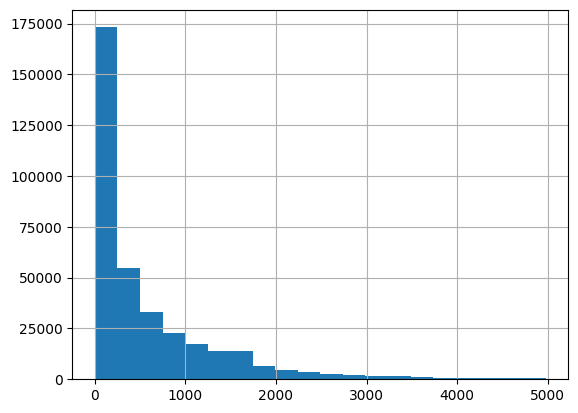

In [26]:
visits_log_us.query('duration < 5000')['duration'].hist(bins=20)

El análisis de la duración de las sesiones en la plataforma revela que, en promedio, las sesiones duran 643.51 segundos (aproximadamente 10 minutos y 44 segundos). Sin embargo, al examinar los percentiles, encontramos algunos insights más detallados:

- El 25% de las sesiones dura 120 segundos (2 minutos) o menos.
- El 50% de las sesiones, es decir, la mediana, tiene una duración de 300 segundos (5 minutos).
- El 75% de las sesiones dura 840 segundos (14 minutos) o menos.
- El 90% de las sesiones se completa en 1,620 segundos (27 minutos).
- El 99% de las sesiones dura hasta 4,500 segundos (1 hora y 15 minutos).

Cabe destacar que, aunque la duración promedio es de aproximadamente 10 minutos, el 99% de los usuarios tiene sesiones que duran 1 minuto y 25 segundos o más, lo que indica que la mayoría de las sesiones son considerablemente breves, mientras que unas pocas pueden ser mucho más largas. Esto sugiere una variabilidad significativa en cómo los usuarios interactúan con la plataforma.

## 2.3 ¿Cuál es la duración de cada sesión?

In [27]:
first_visits = (
    visits_log_us
    .sort_values(by='start ts')
    .groupby('uid')
    .head(1)
    .rename(columns={'month': 'first_month',
                     'start ts': 'first_visit_at'})
)

display(first_visits.head())

,device,end ts,source id,first_visit_at,uid,day,week,first_month,duration
308527,desktop,2017-06-01 00:02:00,5,2017-06-01 00:01:00,13890188992670018146,2017-06-01,2017-05-29,2017-06-01,60
260646,desktop,2017-06-01 00:02:00,3,2017-06-01 00:02:00,16152015161748786004,2017-06-01,2017-05-29,2017-06-01,0
245715,desktop,2017-06-01 00:16:00,3,2017-06-01 00:02:00,16706502037388497502,2017-06-01,2017-05-29,2017-06-01,840
235930,desktop,2017-06-01 00:04:00,3,2017-06-01 00:04:00,8842918131297115663,2017-06-01,2017-05-29,2017-06-01,0
11727,desktop,2017-06-01 00:11:00,1,2017-06-01 00:09:00,10329302124590727494,2017-06-01,2017-05-29,2017-06-01,120


In [28]:
visits_cohort = pd.merge(
    visits_log_us,
    first_visits[['uid', 'first_month']],
    on='uid'
)
visits_cohort['month_age'] = visits_cohort['day'].dt.month - visits_cohort['first_month'].dt.month
visits_cohort['month_age'] += 12* (visits_cohort['day'].dt.year - visits_cohort['first_month'].dt.year)

visits_cohort.head()

,device,end ts,source id,start ts,uid,day,week,month,duration,first_month,month_age
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-18,2017-12-01,1080,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-19,2018-02-01,1680,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-26,2017-07-01,0,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-14,2018-05-01,1440,2018-03-01,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-25,2017-12-01,0,2017-12-01,0


In [29]:
visits_cohort['month_age'].value_counts()

month_age
0     267858
1      23294
2      14833
3      11961
4       9977
5       8497
6       6834
7       5290
8       4009
9       3036
10      2193
11      1618
Name: count, dtype: int64

In [30]:
visits_retention = visits_cohort.pivot_table(
    index='first_month',
    columns='month_age',
    values='uid',
    aggfunc="nunique"
)
visits_retention.fillna('')

month_age,0,1,2,3,4,5,6,7,8,9,10,11
first_month,,,,,,,,,,,,
2017-06-01,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07-01,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0,
2017-08-01,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0,,
2017-09-01,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0,,,
2017-10-01,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0,,,,
2017-11-01,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0,,,,,
2017-12-01,25268.0,1410.0,960.0,786.0,512.0,481.0,,,,,,
2018-01-01,22624.0,1351.0,890.0,565.0,458.0,,,,,,,
2018-02-01,22197.0,1267.0,565.0,446.0,,,,,,,,


In [31]:
visits_retention_rate = visits_retention.copy()

for col in visits_retention_rate.columns:
    visits_retention_rate[col] = visits_retention_rate[col] / visits_retention[0]


visits_retention_rate.fillna('')

month_age,0,1,2,3,4,5,6,7,8,9,10,11
first_month,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,,
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.03586,0.024186,0.022809,,,
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,,,,
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.0218,,,,,
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,,,,,,
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,,,,,,,
2018-02-01,1.0,0.05708,0.025454,0.020093,,,,,,,,


Retención de usuarios:

- La tabla resultante (visits_retention_rate) muestra la tasa de retención de usuarios en función del tiempo (en meses) desde su primera visita.
Por ejemplo, para los usuarios que comenzaron en junio de 2017, el 100% volvió en el primer mes (como es de esperar), pero solo el 7.87% de los usuarios regresó en el segundo mes. Este porcentaje disminuye a medida que pasa el tiempo, mostrando que la retención de usuarios tiende a disminuir con el tiempo.


## 2.4 ¿Con qué frecuencia los usuarios y las usuarias regresan?

In [32]:
visits_retention_rate[1].mean()

np.float64(0.06516659710392834)

month_age
1     0.065167
2     0.046333
3     0.042760
4     0.040595
5     0.039444
6     0.036957
7     0.037509
8     0.035465
9     0.035159
10    0.034062
11    0.044951
dtype: float64

<Axes: xlabel='month_age'>

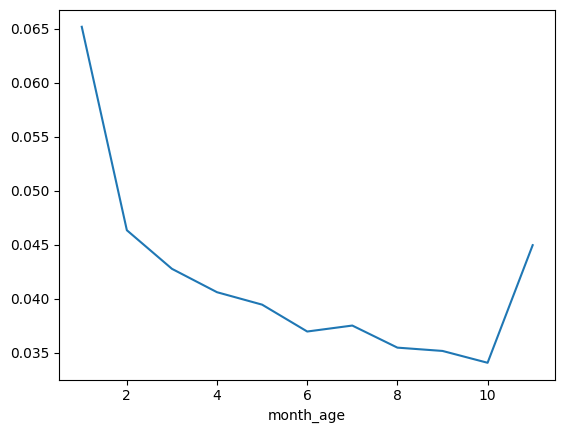

In [33]:
display(visits_retention_rate.iloc[:,1:].mean())

visits_retention_rate.iloc[:,1:].mean().plot(kind='line')

Frecuencia de retorno de usuarios y usuarias:

- Mes 1: En promedio, el 6.52% de los usuarios regresan al mes siguiente de su primera visita.
- Mes 2: La retención cae ligeramente, con un 4.63% de usuarios que regresan dos meses después de su primera visita.
- Mes 3: Un 4.28% de los usuarios vuelve tres meses después de su primera interacción.
- Mes 4: La retención continua su descenso, con un 4.06% de usuarios que regresan cuatro meses después.
- Mes 5-9: La retención se estabiliza en torno al 3.94% a 3.51% entre el quinto y noveno mes.
- Mes 10-11: Sorprendentemente, hay un ligero aumento en el undécimo mes, con una retención del 4.49%.

Este comportamiento indica que, aunque una parte significativa de los usuarios regresa en los primeros meses después de su primera visita, la retención disminuye gradualmente con el tiempo. Sin embargo, un pequeño porcentaje de usuarios sigue regresando incluso después de muchos meses, lo que sugiere que existe un núcleo de usuarios leales que continúan utilizando la plataforma a largo plazo.

## 3 Ventas:
 
- 3.1 ¿Cuándo la gente empieza a comprar? (En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el/la usuario/a se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el/la usuario/a podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d.  Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo).
- 3.2 ¿Cuántos pedidos hacen durante un período de tiempo dado?
- 3.3 ¿Cuál es el tamaño promedio de compra?
- 3.4 ¿Cuánto dinero traen? (LTV)



## 3.1 ¿Cuándo la gente empieza a comprar? 
(En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el/la usuario/a se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el/la usuario/a podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d.  Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo).

In [36]:
orders_log_us.head()

,buy ts,revenue,uid,day,week,month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-05-29,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-05-29,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-05-29,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-05-29,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-05-29,2017-06-01


In [41]:
orders_first_purchases = (
    orders_log_us
    .sort_values(by='buy ts')
    .groupby('uid')
    .head(1)
    .rename(columns={'month': 'first_order_month',
                     'buy ts': 'first_order_at'})
)
orders_first_purchases.head()

,first_order_at,revenue,uid,day,week,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-05-29,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-05-29,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-05-29,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-05-29,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-05-29,2017-06-01


In [43]:
convertion_timestamps = pd.merge(
    orders_first_purchases[['uid', 'first_order_at', 'first_order_month']],
    first_visits[['uid', 'first_visit_at', 'first_month', 'source id']]
)

In [48]:
convertion_timestamps['time_to_order'] = convertion_timestamps['first_order_at'] - convertion_timestamps['first_visit_at']
convertion_timestamps['time_to_order'] /= np.timedelta64(1, 'h')

convertion_timestamps.head()

,uid,first_order_at,first_order_month,first_visit_at,first_month,source id,time_to_order
0,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01 00:09:00,2017-06-01,1,0.016667
1,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01 00:14:00,2017-06-01,2,0.183333
2,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01 00:25:00,2017-06-01,2,0.033333
3,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01 00:14:00,2017-06-01,2,0.250000
4,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01 07:31:00,2017-06-01,3,0.450000


In [62]:
# Número total de usuarios
total_users = len(convertion_timestamps)

# Número máximo de horas (puedes modificar este valor si necesitas más iteraciones)
max_hours = 240  # Esto representaría 10 días (240 horas)

# Iteramos desde 24 horas hasta el máximo definido, en intervalos de 24 horas
for hours in range(24, max_hours + 1, 24):  
    conversion = (convertion_timestamps['time_to_order'] < hours).sum() / total_users
    
    
    display(f"Convertion {hours // 24}d: {conversion:.4f}")

'Convertion 1d: 0.7218'

'Convertion 2d: 0.7495'

'Convertion 3d: 0.7649'

'Convertion 4d: 0.7768'

'Convertion 5d: 0.7857'

'Convertion 6d: 0.7931'

'Convertion 7d: 0.8002'

'Convertion 8d: 0.8061'

'Convertion 9d: 0.8113'

'Convertion 10d: 0.8152'

## Resultado:

Análisis del tiempo de conversión: ¿Cuándo la gente empieza a comprar?
- Conversión 0d: El 72.18% de los usuarios realiza su primera compra dentro de las primeras 24 horas después de registrarse.
- Conversión 1d: El 74.95% de los usuarios realiza su primera compra dentro de las primeras 48 horas después de registrarse.
- Conversión 2d: El 76.49% de los usuarios realiza su primera compra dentro de los primeros 3 días (72 horas) después de registrarse.
Interpretación:

Estos resultados indican que la mayoría de las conversiones ocurren muy pronto después de que los usuarios se registran. El 72.18% de los usuarios convierte el mismo día que se registran, y este porcentaje aumenta gradualmente en los días siguientes, alcanzando el 76.49% al tercer día.

El comportamiento observado sugiere que las estrategias que buscan incentivar la compra inmediata son efectivas, pero también destaca la importancia de mantener el compromiso con los usuarios durante los primeros días para captar a aquellos que no convierten de inmediato. Este análisis proporciona una visión clara de las ventanas de tiempo más críticas para la conversión, permitiendo que se diseñen estrategias específicas para maximizar el número de conversiones en esos períodos.

## 3.2 ¿Cuántos pedidos hacen durante un período de tiempo dado?

In [102]:
count_order_per_time = pd.DataFrame()

count_order_per_time['day'] = orders_log_us.groupby('day')['uid'].count()
count_order_per_time['week'] = orders_log_us.groupby('week')['uid'].count()
count_order_per_time['month'] = orders_log_us.groupby('month')['uid'].count()

count_order_per_time.head()

,day,week,month
day,,,
2017-06-01,96,NaN,2354.0
2017-06-02,111,NaN,NaN
2017-06-03,67,NaN,NaN
2017-06-04,66,NaN,NaN
2017-06-05,161,938.0,NaN


In [109]:
# Promedio de pedidos por día
average_orders_per_day = count_order_per_time[['day']].mean(axis=1).mean()

# Promedio de pedidos por semana
average_orders_per_week = count_order_per_time['week'].mean()

# Promedio de pedidos por mes
average_orders_per_month = count_order_per_time['month'].mean()

# Mostrar los resultados
print(f"Promedio general de pedidos por día: {average_orders_per_day}")
print(f"Promedio de pedidos por semana: {average_orders_per_week}")
print(f"Promedio de pedidos por mes: {average_orders_per_month}")

Promedio general de pedidos por día: 138.50274725274724
Promedio de pedidos por semana: 962.9807692307693
Promedio de pedidos por mes: 3928.5


Durante el período de tiempo analizado, se observó lo siguiente:

- Promedio general de pedidos por día: En promedio, se realizan aproximadamente 138.50 pedidos por día.
- Promedio de pedidos por semana: En una semana promedio, se realizan aproximadamente 962.98 pedidos.
- Promedio de pedidos por mes: En un mes promedio, se realizan alrededor de 3928.5 pedidos.

Estos valores proporcionan una visión clara de la actividad de pedidos en diferentes escalas de tiempo, permitiendo una mejor planificación y toma de decisiones.

## 3.3 ¿Cuál es el tamaño promedio de compra?

In [123]:
revenue_by_user_per_month = (
    orders_log_us
    .groupby(['uid', 'month'])['revenue']
    .sum()
    .reset_index()
)    
revenue_by_user_per_month.head()

,uid,month,revenue
0,313578113262317,2018-01-01,0.55
1,1575281904278712,2017-06-01,3.05
2,2429014661409475,2017-10-01,73.33
3,2464366381792757,2018-01-01,2.44
4,2551852515556206,2017-11-01,10.99


In [124]:
revenue_with_cohort = pd.merge(
    revenue_by_user_per_month,
    first_visits[['uid', 'source id']],
    on='uid'
).merge(
    orders_first_purchases[['uid', 'first_order_at', 'first_order_month']],
    on='uid'
)
revenue_with_cohort['month_age'] = revenue_with_cohort['month'].dt.month - revenue_with_cohort['first_order_month'].dt.month
revenue_with_cohort['month_age'] += 12* (revenue_with_cohort['month'].dt.year - revenue_with_cohort['first_order_month'].dt.year)

ltv_table = revenue_with_cohort.pivot_table(
    index='first_order_month',
    columns='month_age',
    values='revenue',
    aggfunc="sum"
)
ltv_table.fillna('')

month_age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,9557.49,981.82,885.34,1931.3,2068.58,1487.92,1922.74,1176.56,1119.15,1225.51,1155.66,519.62
2017-07-01,11557.65,644.61,1199.05,690.31,339.97,300.08,231.16,272.72,310.05,282.96,299.36,
2017-08-01,7228.83,646.63,628.12,536.05,676.85,388.45,288.61,554.86,400.33,257.53,,
2017-09-01,14568.53,2884.49,1344.52,10261.52,1033.84,1670.08,1810.85,627.57,474.92,,,
2017-10-01,21716.20,2325.21,830.65,682.01,657.77,522.37,368.1,501.14,,,,
2017-11-01,21036.26,1629.27,814.39,1326.13,604.04,219.88,469.02,,,,,
2017-12-01,20767.49,1141.22,4054.7,4669.1,1371.57,1481.66,,,,,,
2018-01-01,13949.50,994.22,1026.34,481.59,211.48,,,,,,,
2018-02-01,15177.16,1015.98,286.66,270.7,,,,,,,,


## 3.4 ¿Cuánto dinero traen? (LTV)

In [174]:
revenue_per_client = revenue_with_cohort.groupby(['uid', 'source id'])['revenue'].sum().reset_index()


ltv_per_source = revenue_per_client.groupby('source id')['revenue'].sum().reset_index()
ltv_per_source.columns = ['source_id', 'LTV']

ltv_total = ltv_per_source['LTV'].sum()

print("LTV por fuente de adquisición:")
display(ltv_per_source)

print(f"\nLTV total: {ltv_total}")

LTV por fuente de adquisición:


,source_id,LTV
0,1,31090.55
1,2,46923.61
2,3,54511.24
3,4,56696.83
4,5,52624.02
5,7,1.22
6,9,5759.40
7,10,4450.33



LTV total: 252057.2


El análisis del valor de vida del cliente (LTV) revela cuánto dinero han generado los clientes a lo largo de su ciclo de vida, desglosado por las diferentes fuentes de adquisición. A continuación, se detalla el LTV por fuente de adquisición:

- Fuente 1: $31,090.55
- Fuente 2: $46,923.61
- Fuente 3: $54,511.24
- Fuente 4: $56,696.83
- Fuente 5: $52,624.02
- Fuente 7: $1.22
- Fuente 9: $5,759.40
- Fuente 10: $4,450.33

LTV total: La suma total de ingresos generados por todos los clientes es de $252,057.20.


# 4 Marketing:
 
- 4.1 ¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo)
- 4.2 ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?
- 4.3 ¿Cuán rentables eran las inversiones? (ROMI)

Traza gráficos para mostrar cómo difieren estas métricas para varios dispositivos y fuentes de anuncios y cómo cambian con el tiempo. 

## 4.1 ¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo)

In [133]:
daily_cost = (
    costs_us
    .groupby(['day', 'source_id'])['costs']
    .sum()
    .reset_index()
)

daily_cost.head(2)

,day,source_id,costs
0,2017-06-01,1,75.20
1,2017-06-01,2,132.56


In [135]:
first_orders_with_source = pd.merge(
    orders_first_purchases,
    first_visits[['uid', 'source id']],
    on='uid'
).rename(columns={'source id': 'source_id'})

first_orders_with_source.head()

,first_order_at,revenue,uid,day,week,first_order_month,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-05-29,2017-06-01,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-05-29,2017-06-01,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-05-29,2017-06-01,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-05-29,2017-06-01,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-05-29,2017-06-01,3


In [147]:
daily_acquisition = (
    first_orders_with_source
    .groupby(['source_id', 'day'])['uid']
    .nunique()
    .reset_index()
    .rename(columns={'uid': 'new_users'})
)

daily_acquisition.head()


,source_id,day,new_users
0,1,2017-06-01,14
1,1,2017-06-02,7
2,1,2017-06-03,7
3,1,2017-06-04,3
4,1,2017-06-05,18


In [152]:
daily_cac = pd.merge(
    daily_cost,
    daily_acquisition,
    on=['day','source_id']
)
daily_cac['cac'] = daily_cac['costs'] / daily_cac['new_users']

daily_cac.head()


,day,source_id,costs,new_users,cac
0,2017-06-01,1,75.20,14,5.371429
1,2017-06-01,2,132.56,11,12.050909
2,2017-06-01,3,349.38,33,10.587273
3,2017-06-01,4,76.74,10,7.674000
4,2017-06-01,5,73.24,13,5.633846


In [165]:
daily_cac['month'] = daily_cac['day'].dt.to_period('M')

cost_per_source = daily_cac.groupby('source_id')['costs'].sum().reset_index()
total_costs = cost_per_source['costs'].sum()


print("Costo total por fuente de adquisición:")
display(cost_per_source)
print(f"\nCosto total: {total_costs}")

Costo total por fuente de adquisición:


,source_id,costs
0,1,20785.41
1,2,42777.37
2,3,141321.63
3,4,61057.91
4,5,51756.40
5,9,4775.16
6,10,5351.94



Costo total: 327825.82


El análisis de los costos asociados a las diferentes fuentes de adquisición revela el siguiente desglose:

- Fuente 1: $20,785.41
- Fuente 2: $42,777.37
- Fuente 3: $141,321.63
- Fuente 4: $61,057.91
- Fuente 5: $51,756.40
- Fuente 9: $4,775.16
- Fuente 10: $5,351.94

Costo total: La suma total de los gastos en todas las fuentes de adquisición es de $327,825.82.

Estos resultados reflejan la inversión realizada a través de las distintas fuentes, permitiendo identificar cuáles han implicado un mayor desembolso a lo largo del tiempo.

## 4.2 ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?

In [153]:
daily_cac.groupby('source_id')['cac'].mean().reset_index()

,source_id,cac
0,1,9.489732
1,2,16.287024
2,3,15.580474
3,4,7.271743
4,5,8.336731
5,9,6.842532
6,10,6.555415


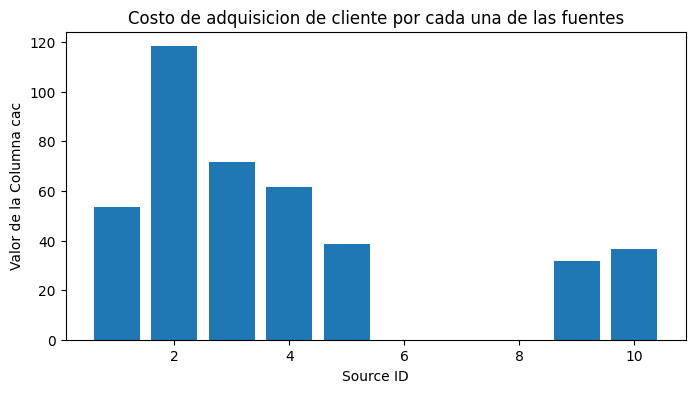

In [242]:
plt.figure(figsize=(8, 4))  # Ajusta el tamaño del gráfico
plt.bar(daily_cac['source_id'], daily_cac['cac'])


plt.xlabel('Source ID')
plt.ylabel('Valor de la Columna cac')
plt.title('Costo de adquisicion de cliente por cada una de las fuentes')


plt.show()

El costo de adquisición de clientes (CAC) para cada una de las fuentes de adquisición se detalla a continuación:

- Fuente 1: $9.49
-Fuente 2: $16.29
- Fuente 3: $15.58
- Fuente 4: $7.27
- Fuente 5: $8.34
- Fuente 9: $6.84
- Fuente 10: $6.56

Estos valores representan el costo promedio en dólares para adquirir un cliente nuevo desde cada fuente de adquisición específica. Esto proporciona una visión clara de la eficiencia de cada canal en términos de costos.

## 4.3 ¿Cuán rentables eran las inversiones? (ROMI)

In [244]:
ltv_sum_per_source = ltv_per_source.groupby('source_id')['LTV'].sum()

costs_sum_per_source = daily_cac.groupby('source_id')['costs'].sum()


romi_per_source = ((ltv_sum_per_source / costs_sum_per_source) - 1) * 100
romi_per_source = romi_per_source.to_frame().reset_index()

romi_per_source

,source_id,0
0,1,49.578719
1,2,9.692601
2,3,-61.427532
3,4,-7.142531
4,5,1.676353
5,7,NaN
6,9,20.611665
7,10,-16.846415


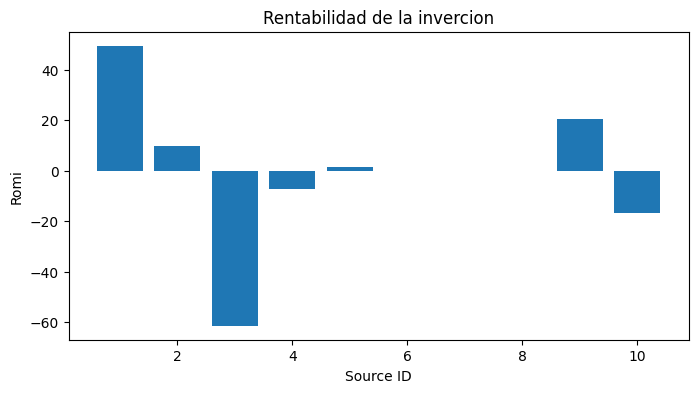

In [248]:
plt.figure(figsize=(8, 4))  
plt.bar(romi_per_source['source_id'], romi_per_source[0])


plt.xlabel('Source ID')
plt.ylabel('Romi')
plt.title('Rentabilidad de la invercion')

plt.show()

El análisis de la rentabilidad de las inversiones en las diferentes fuentes de adquisición muestra los siguientes resultados:

- Fuente 1: Un ROMI de 49.58%, lo que indica una alta rentabilidad en esta fuente.
- Fuente 2: Un ROMI de 9.69%, que aunque es positivo, muestra un retorno modesto.
- Fuente 3: Un ROMI negativo de -61.43%, sugiriendo pérdidas significativas.
- Fuente 4: Un ROMI negativo de -7.14%, también indicando pérdidas.
- Fuente 5: Un ROMI ligeramente positivo de 1.68%, que refleja un retorno mínimo.
- Fuente 7: No se disponen datos suficientes (NaN) para evaluar la rentabilidad de esta fuente.
- Fuente 9: Un ROMI de 20.61%, mostrando una rentabilidad razonable.
- Fuente 10: Un ROMI negativo de -16.85%, lo que sugiere pérdidas.

En resumen, las fuentes 1 y 9 son las más rentables, mientras que las fuentes 3, 4 y 10 presentan pérdidas que deben ser reevaluadas. La fuente 7 requiere más datos para una evaluación precisa.

# Conclusiones del estudio de caso: 

## Resumen de las Fuentes de Adquisición y Análisis Métrico
## Usuarios Activos y Sesiones:

### - Usuarios Activos:
La plataforma tiene un promedio diario de 907 usuarios, 5,716 usuarios semanales, y 23,228 usuarios mensuales. Esto demuestra que la plataforma tiene un flujo constante de usuarios a lo largo del tiempo, lo que es positivo para la sostenibilidad del negocio.

### - Duración de las Sesiones: 
El tiempo promedio de sesión es de 643.51 segundos (aproximadamente 10 minutos y 44 segundos). Sin embargo, existe una gran variabilidad en la duración de las sesiones. El 25% de las sesiones dura 2 minutos o menos, y el 50% de las sesiones (mediana) dura 5 minutos. Solo el 1% de las sesiones dura más de 1 hora y 15 minutos. Este análisis sugiere que, aunque algunos usuarios pasan más tiempo en la plataforma, la mayoría tiene interacciones relativamente breves. Esto podría indicar que la plataforma es eficaz para cumplir con ciertas necesidades rápidamente, o bien que los usuarios no encuentran suficiente valor para permanecer más tiempo.

## Retención de Usuarios:

### - Tasa de Retención: 
La retención de usuarios disminuye significativamente con el tiempo. En promedio, solo el 6.52% de los usuarios regresa al mes siguiente de su primera visita, y este porcentaje sigue disminuyendo hasta estabilizarse entre el 3.51% y el 3.94% a partir del quinto mes. Un dato interesante es el ligero aumento de retención en el undécimo mes al 4.49%, lo que sugiere que algunos usuarios podrían volver después de un periodo prolongado. Estos resultados indican que la mayoría de los usuarios no son leales a largo plazo, pero existe un grupo pequeño que continúa regresando.

### Frecuencia de Conversión y Comportamiento de Compra:

### - Conversión Temprana: 
Un 72.18% de los usuarios realiza su primera compra dentro de las primeras 24 horas después de registrarse en la plataforma. Este porcentaje aumenta a 74.95% en las primeras 48 horas y alcanza el 76.49% dentro de los primeros 3 días. Esto indica que la mayoría de las conversiones ocurren rápidamente, lo que sugiere que las estrategias que impulsan compras inmediatas son efectivas. Sin embargo, también señala la importancia de mantener un seguimiento constante con aquellos usuarios que no convierten de inmediato para maximizar el potencial de ventas.

### Ingresos Generados (LTV) y Costos:

### - Valor de Vida del Cliente (LTV): 
El análisis revela que las fuentes de adquisición más rentables en términos de LTV son las Fuente 4 ($56,696.83) y Fuente 3 ($54,511.24). En contraste, la Fuente 7 genera solo $1.22 en ingresos, lo que puede ser un indicio de ineficiencia o falta de datos suficientes.

### - Costos Totales: 
La plataforma ha invertido un total de $327,825.82 en todas las fuentes de adquisición. La Fuente 3 ha tenido el mayor costo con $141,321.63, seguida de la Fuente 4 con $61,057.91. Aunque estas fuentes tienen altos costos, sus LTV también son relativamente altos, lo que plantea la pregunta sobre si el retorno de inversión justifica los gastos.

## - Costo de Adquisición de Clientes (CAC):
El CAC más bajo lo tiene la Fuente 10 con $6.56, seguido de la Fuente 9 con $6.84. Estos bajos costos de adquisición podrían indicar que estas fuentes son eficaces para atraer nuevos clientes a un costo razonable.
En contraste, la Fuente 2 tiene el CAC más alto con $16.29, lo que sugiere que atraer clientes desde esta fuente es más costoso. Dado que su ROMI también es bajo, es posible que esta fuente no sea tan rentable como otras.

### Retorno de la Inversión en Marketing (ROMI):

Fuente 1 tiene el ROMI más alto con 49.58%, lo que indica una alta rentabilidad. Esta fuente genera buenos ingresos en relación con el costo invertido, lo que la convierte en una excelente candidata para futuras inversiones.
Fuente 9 también muestra un ROMI positivo de 20.61%, sugiriendo que es otra fuente efectiva para la adquisición de clientes rentables.
En cambio, Fuente 3, Fuente 4, y Fuente 10 presentan ROMIs negativos de -61.43%, -7.14%, y -16.85%, respectivamente. Estos resultados indican que estas fuentes no están siendo rentables y podrían estar contribuyendo a pérdidas financieras. Es importante investigar por qué estos canales no están funcionando como se esperaba.

# Recomendaciones Detalladas
## Inversiones Prioritarias en Fuentes Rentables:

Fuente 1 ha demostrado ser la fuente más rentable con un ROMI del 49.58%. Sería beneficioso continuar invirtiendo en esta fuente e incluso explorar formas de optimizarla para atraer aún más clientes. Además, Fuente 9 también muestra un buen retorno, lo que justifica la continuación o expansión de la inversión en este canal.
Estrategia: Considera mejorar las campañas publicitarias, promociones o contenido dirigido específicamente a usuarios provenientes de estas fuentes. Mantén un seguimiento constante del rendimiento para asegurarte de que sigan siendo rentables.

### - Reevaluación y Optimización de Fuentes con Pérdidas:

Las Fuentes 3, 4 y 10 presentan ROMIs negativos y altos costos de adquisición. Dado que estas fuentes están generando pérdidas, es crucial reevaluarlas. Podrías considerar reducir o redirigir la inversión hacia canales más rentables o revisar la estrategia de marketing utilizada en estos canales para intentar mejorar su desempeño.

### - Estrategia: 
Realiza un análisis más profundo de las campañas en estas fuentes para identificar posibles fallos en la segmentación, creatividad o enfoque. También puedes probar estrategias de re-marketing o optimización del embudo de ventas para ver si es posible mejorar la conversión y el retorno en estas fuentes.

### - Mejorar la Retención de Usuarios:
Aunque la conversión temprana es alta, la retención de usuarios disminuye considerablemente con el tiempo. Para aumentar la lealtad y el valor de vida del cliente, sería beneficioso implementar estrategias de re-engagement. Estas podrían incluir campañas de correo electrónico, notificaciones push, promociones exclusivas para usuarios recurrentes o programas de fidelidad.
Estrategia: Segmenta a los usuarios según su comportamiento de compra y su frecuencia de visita, y ofrece incentivos personalizados para fomentar su retorno a la plataforma.

### - Optimización de Costos en Fuentes con Alto CAC:
Fuente 2 tiene un CAC elevado de $16.29, lo que sugiere que atraer clientes desde esta fuente es costoso. Considera reducir la inversión en esta fuente o explorar formas de optimizar las campañas publicitarias para reducir el costo por adquisición.
Estrategia: Prueba con diferentes tipos de anuncios o plataformas publicitarias dentro de la fuente para ver si puedes reducir el costo por adquisición sin sacrificar la calidad de los usuarios adquiridos.

### - Investigación y Monitoreo de la Fuente 7:
Fuente 7 no tiene suficientes datos para una evaluación precisa, lo que puede ser un problema a la hora de tomar decisiones informadas. Considera recopilar más datos de esta fuente o hacer una prueba piloto con una inversión controlada para ver si puede ser una fuente rentable.
Estrategia: Establece un plan de pruebas y análisis para la Fuente 7, y monitorea de cerca su rendimiento. Si los datos indican potencial, escala la inversión de manera gradual.

### - Mantener y Fortalecer las Estrategias de Conversión Temprana:

Dado que el 72.18% de las conversiones ocurren dentro de las primeras 24 horas después del registro, es crucial mantener y mejorar las estrategias que impulsan estas conversiones tempranas. Las promociones inmediatas, la experiencia de usuario optimizada y las comunicaciones dirigidas pueden seguir siendo herramientas clave.
### -Estrategia: 
Evalúa continuamente las experiencias iniciales de los usuarios para garantizar que las barreras para la conversión sean mínimas. Considera implementar más llamadas a la acción o pruebas gratuitas que puedan aumentar aún más la tasa de conversión temprana.

## Conclusiones
El análisis de las métricas muestra que existen oportunidades claras para mejorar la eficiencia y rentabilidad de las fuentes de adquisición. Las Fuentes 1 y 9 son claras ganadoras, mientras que las Fuentes 3, 4 y 10 necesitan una reevaluación crítica. La retención de usuarios sigue siendo un desafío, lo que subraya la necesidad de estrategias de re-engagement para mantener a los usuarios en la plataforma. Optimizar los costos y ajustar las inversiones basadas en un análisis continuo permitirá